This notebook examines the results of the initial clustering.

In [1]:
# Allow imports from `..`
import os
import sys

module_path = os.path.abspath("..")
if module_path not in sys.path:
   sys.path.append(module_path)

In [2]:
from src.acled import read_acled
from src.utils import *

In [3]:
import pickle

import geopandas
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sklearn as skl
import sklearn.cluster 
from sklearn.preprocessing import StandardScaler

In [5]:
all_cl = read_acled('/Users/kandel/Desktop/Project/Rfiles/all.csv')
all_cl = reproject_xy(all_cl)
all_cl.head()

,Unnamed: 0,data_id,cluster_label,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,...,event_ctr_actor1_30,fatality_sum_actor1_.30,fatality_sum_actor1_30,event_ctr_actor1_inter_.30,event_ctr_actor1_inter_30,fatality_sum_actor1_inter_.30,fatality_sum_actor1_inter_30,geometry,x,y
0,1,4554798,12,566,NIG14152,14152,2019-03-09,2019,1,Violence against civilians,...,30,50,85,61,19,26,34,POINT (7.33410 12.26160),-1.631477e+06,3.818911e+06
1,2,4554799,12,566,NIG14153,14153,2019-03-09,2019,1,Violence against civilians,...,30,50,85,61,19,26,34,POINT (8.88330 7.56670),-1.485016e+06,3.288928e+06
2,3,4554802,19,566,NIG14156,14156,2019-03-09,2019,1,Battles,...,2,22,0,0,0,0,0,POINT (7.45700 6.98250),-1.642688e+06,3.229026e+06
3,4,4554803,19,566,NIG14157,14157,2019-03-09,2019,1,Battles,...,30,50,85,9,9,22,20,POINT (7.22020 12.30010),-1.643500e+06,3.823742e+06
4,5,4554808,99,566,NIG14162,14162,2019-03-09,2019,1,Violence against civilians,...,5,3,5,4,3,3,0,POINT (6.46340 5.07650),-1.758057e+06,3.019817e+06


<AxesSubplot:>

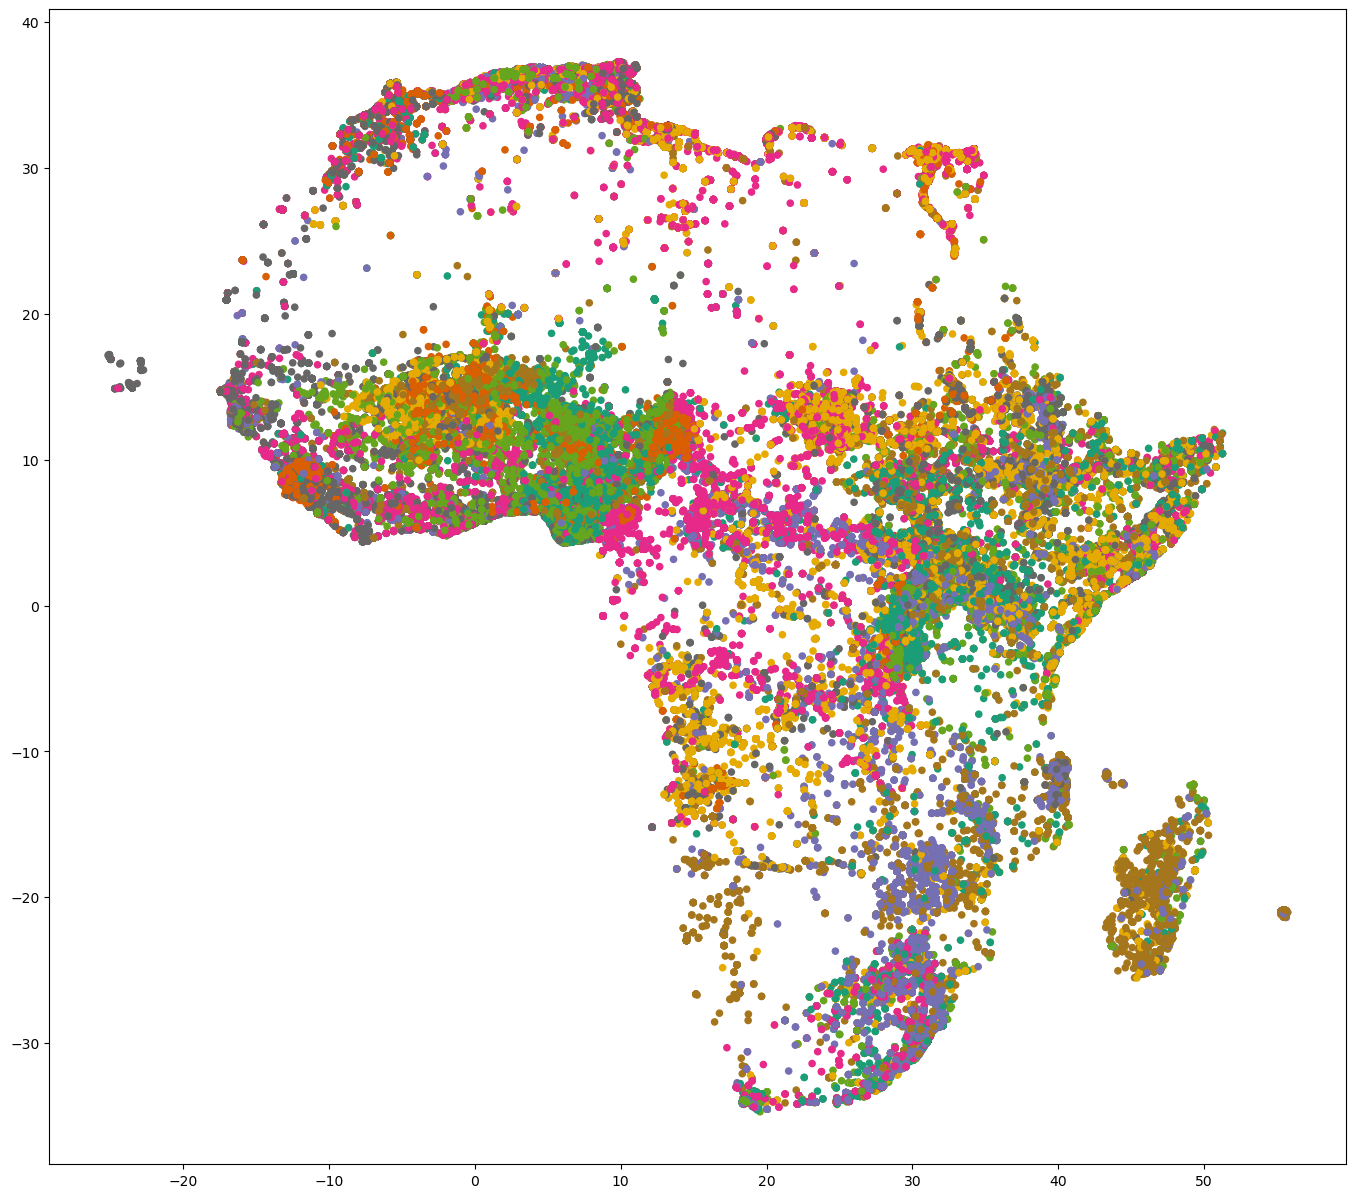

In [8]:
a11 = all_cl.plot(column='cluster_label',figsize=(20,15),markersize = 20, cmap = "Dark2")
a11

In [9]:
all_imp = read_acled('/Users/kandel/Desktop/Project/Rfiles/all_imp.csv')
all_imp = reproject_xy(all_imp)
all_imp.head()

,Unnamed: 0,data_id,cluster_label,iso,event_id_cnty,event_id_no_cnty,event_date,year,time_precision,event_type,...,event_ctr_actor1_30,fatality_sum_actor1_.30,fatality_sum_actor1_30,event_ctr_actor1_inter_.30,event_ctr_actor1_inter_30,fatality_sum_actor1_inter_.30,fatality_sum_actor1_inter_30,geometry,x,y
0,17,4555008,8,404,KEN6850,6850,2019-03-08,2019,1,Violence against civilians,...,3,2,2,1,1,0,1,POINT (35.55000 0.99000),1.439370e+06,2.554391e+06
1,159,4564831,8,404,KEN6836,6836,2019-02-07,2019,2,Violence against civilians,...,4,8,3,9,2,8,1,POINT (36.81700 -1.28300),1.581952e+06,2.304063e+06
2,183,4566263,8,404,KEN6833,6833,2019-02-02,2019,1,Violence against civilians,...,4,6,2,8,3,6,2,POINT (36.67130 -1.26920),1.565848e+06,2.305257e+06
3,206,4567131,8,404,KEN6829,6829,2019-01-30,2019,1,Violence against civilians,...,6,4,5,6,5,4,5,POINT (37.62880 -1.78080),1.672047e+06,2.250442e+06
4,242,4569032,8,404,KEN6792,6792,2019-01-24,2019,1,Violence against civilians,...,2,2,0,2,2,2,0,POINT (36.90100 -1.33300),1.591275e+06,2.298684e+06


<AxesSubplot:>

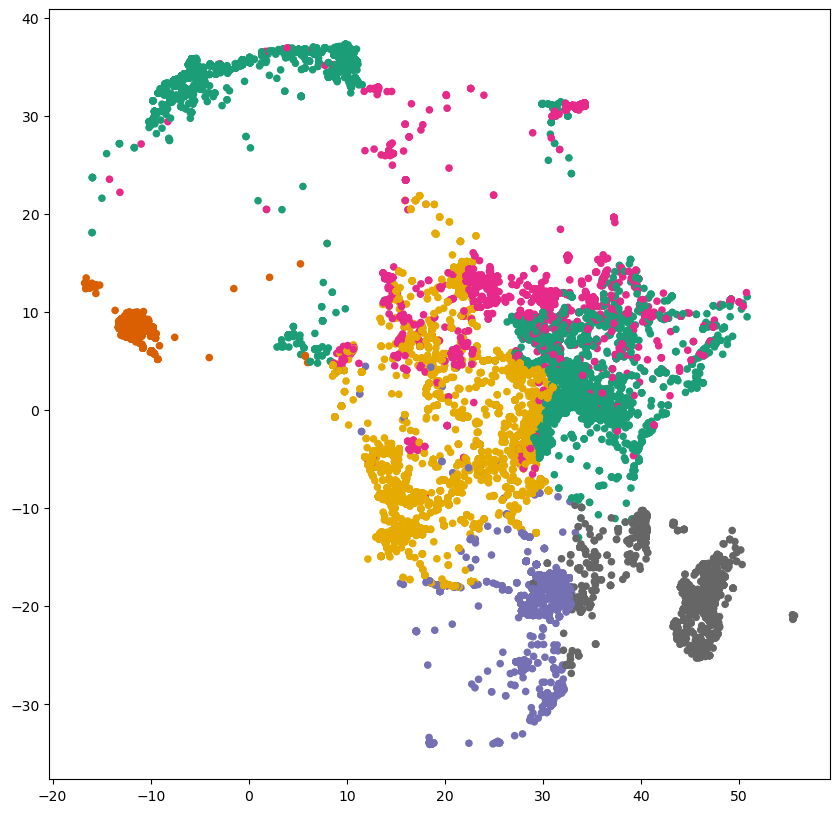

In [10]:
a22 = all_imp.plot(column='cluster_label',figsize=(15,10), markersize = 20, cmap = "Dark2")
a22